<a href="https://colab.research.google.com/github/sallytran02/IS4487/blob/main/Copy_of_lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/x_superbowl.csv')

print(df)

df.describe()




Mounted at /content/gdrive
      Unnamed: 0                       _id                      created_at  \
0              0  6020fc7e9e1aa8e3e7ad0832  Mon Feb 08 04:29:58 +0000 2021   
1              1  6020fc7e9e1aa8e3e7ad0833  Mon Feb 08 04:29:55 +0000 2021   
2              2  6020fc7e9e1aa8e3e7ad0834  Mon Feb 08 04:29:48 +0000 2021   
3              3  6020fc7e9e1aa8e3e7ad0835  Mon Feb 08 04:29:43 +0000 2021   
4              4  6020fc7e9e1aa8e3e7ad0836  Mon Feb 08 04:29:42 +0000 2021   
...          ...                       ...                             ...   
9751           3  6020fbb89e1aa8e3e7ac0a78  Mon Feb 08 02:01:58 +0000 2021   
9752           4  6020fbb89e1aa8e3e7ac0a79  Mon Feb 08 01:00:24 +0000 2021   
9753           5  6020fbb89e1aa8e3e7ac0a7a  Sun Feb 07 23:44:20 +0000 2021   
9754           6  6020fbb89e1aa8e3e7ac0a7b  Sun Feb 07 23:33:40 +0000 2021   
9755           7  6020fbb89e1aa8e3e7ac0a7c  Sun Feb 07 23:32:32 +0000 2021   

                id               id_

,Unnamed: 0,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,contributors,quote_count,reply_count,retweet_count,favorite_count,quoted_status_id,quoted_status_id_str
count,9756.000000,9.756000e+03,9.756000e+03,2.863000e+03,2.863000e+03,2.985000e+03,2.985000e+03,0.0,9756.000000,9756.000000,9756.000000,9756.000000,2.400000e+02,2.400000e+02
mean,4749.132226,1.358590e+18,1.358590e+18,1.357976e+18,1.357976e+18,7.661037e+17,7.661036e+17,NaN,0.024395,0.289565,0.187577,1.862854,1.351627e+18,1.351627e+18
std,2813.702919,2.346799e+13,2.281055e+13,1.813591e+16,1.813591e+16,5.781080e+17,5.781079e+17,NaN,0.248871,1.934631,3.435467,31.547737,5.209077e+16,5.209088e+16
min,0.000000,1.358560e+18,1.358559e+18,4.475270e+17,4.475267e+17,2.682300e+04,2.682300e+04,NaN,0.000000,0.000000,0.000000,0.000000,8.165590e+17,8.165588e+17
25%,2308.750000,1.358570e+18,1.358567e+18,1.358560e+18,1.358558e+18,1.399829e+09,1.399829e+09,NaN,0.000000,0.000000,0.000000,0.000000,1.358278e+18,1.358279e+18
50%,4747.500000,1.358590e+18,1.358587e+18,1.358580e+18,1.358576e+18,1.041530e+18,1.041529e+18,NaN,0.000000,0.000000,0.000000,0.000000,1.358545e+18,1.358544e+18
75%,7186.250000,1.358610e+18,1.358610e+18,1.358600e+18,1.358600e+18,1.284830e+18,1.284832e+18,NaN,0.000000,0.000000,0.000000,1.000000,1.358580e+18,1.358579e+18
max,9625.000000,1.358630e+18,1.358634e+18,1.358630e+18,1.358634e+18,1.358610e+18,1.358606e+18,NaN,12.000000,87.000000,264.000000,2830.000000,1.358630e+18,1.358633e+18


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [5]:
selected_columns = ['id_str', 'created_at', 'text', 'source', 'user', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'lang', 'retweeted_status', 'extended_tweet']

useful_columns = df[selected_columns].copy()  # Use .copy() to create a new DataFrame

# Display summary statistics
useful_columns.describe()

# Display the new DataFrame
print(useful_columns)



                   id_str                      created_at  \
0     1358634152719839233  Mon Feb 08 04:29:58 +0000 2021   
1     1358634138639605762  Mon Feb 08 04:29:55 +0000 2021   
2     1358634110600826880  Mon Feb 08 04:29:48 +0000 2021   
3     1358634090350583809  Mon Feb 08 04:29:43 +0000 2021   
4     1358634084537352192  Mon Feb 08 04:29:42 +0000 2021   
...                   ...                             ...   
9751  1358596905886863363  Mon Feb 08 02:01:58 +0000 2021   
9752  1358581411008102402  Mon Feb 08 01:00:24 +0000 2021   
9753  1358562270763122689  Sun Feb 07 23:44:20 +0000 2021   
9754  1358559585804693513  Sun Feb 07 23:33:40 +0000 2021   
9755  1358559299946106883  Sun Feb 07 23:32:32 +0000 2021   

                                                   text  \
0         @Rebe_Charizard ?????????????????????m(*_ _)m   
1     RT @iiiRatcha: ????????????????????"??????????...   
2     @kashDAI not you listening to cfm and m&amp;m ...   
3     RT @_soniashenoy: M&amp;M

## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

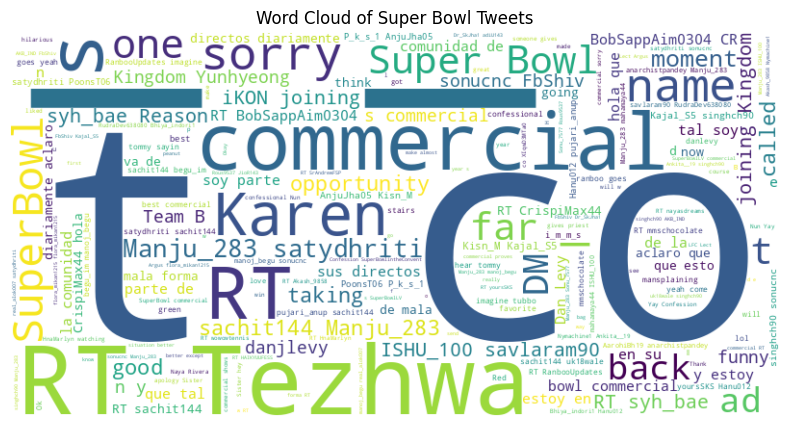

In [8]:
#chart 1

from wordcloud import WordCloud, STOPWORDS

# Assuming 'text' is your column with tweet text
text_combined = ' '.join(useful_columns['text'].dropna())

# Define additional custom stop words
custom_stopwords = {'https', 'amp', 'm', 'iiiRatcha', 'sns3'}

# Combine predefined and custom stop words
all_stopwords = set(STOPWORDS).union(custom_stopwords)

# Generate Word Cloud with custom stop words
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=all_stopwords).generate(text_combined)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Super Bowl Tweets')
plt.show()


<ipython-input-7-a8562ec0d265>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_engagement', y='text', data=top_10_posts, palette='magma')


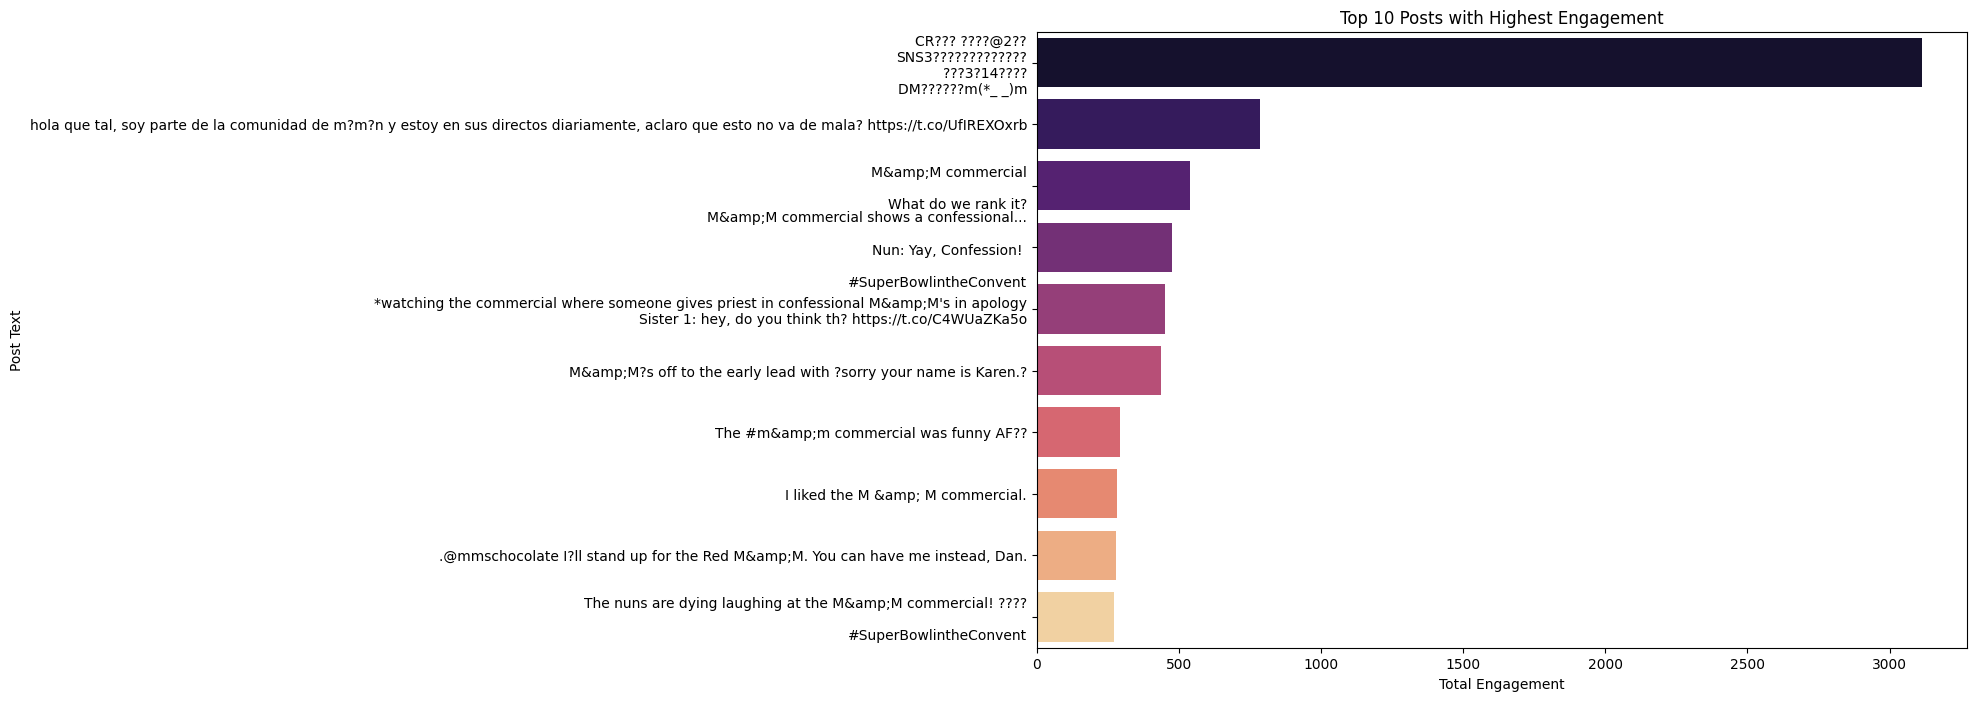

In [7]:
#chart 2

df['total_engagement'] = useful_columns['quote_count'] + df['reply_count'] + df['retweet_count'] + df['favorite_count']

# Select top 10 posts with highest engagement
top_10_posts = df.nlargest(10, 'total_engagement')[['text', 'total_engagement']]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='total_engagement', y='text', data=top_10_posts, palette='magma')
plt.title('Top 10 Posts with Highest Engagement')
plt.xlabel('Total Engagement')
plt.ylabel('Post Text')
plt.show()


<ipython-input-10-2538c24ebef2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.index, y=top_languages.values, palette='viridis')


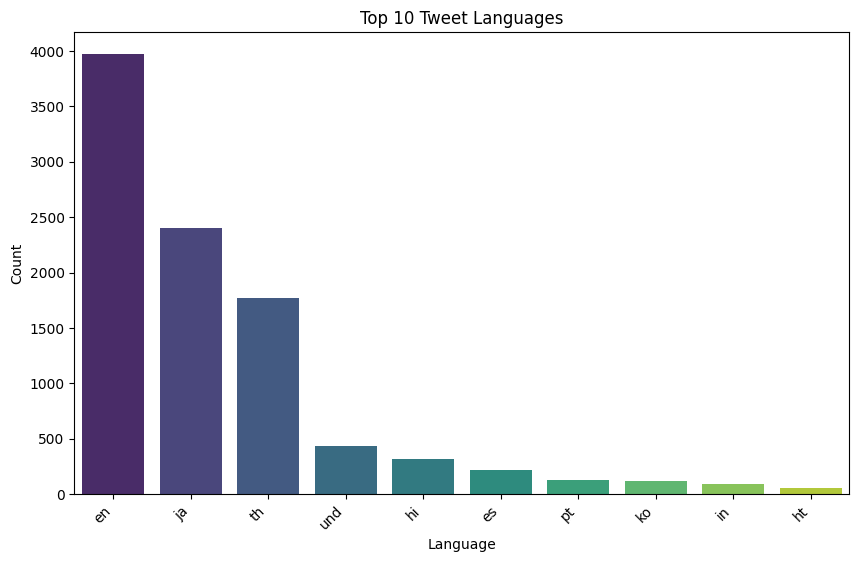

In [10]:
# chart 3

top_languages = useful_columns['lang'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.index, y=top_languages.values, palette='viridis')
plt.title('Top 10 Tweet Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()
